In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### ***Import the dataset:***

In [2]:
matches = pd.read_csv('/content/matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
deliveries = pd.read_csv('/content/deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82708,350,2,Kings XI Punjab,Royal Challengers Bangalore,18,5.0,AM Nayar,DJ Hussey,DL Vettori,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
82709,350,2,Kings XI Punjab,Royal Challengers Bangalore,18,6.0,DJ Hussey,AM Nayar,DL Vettori,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
82710,350,2,Kings XI Punjab,Royal Challengers Bangalore,19,1.0,AM Nayar,DJ Hussey,Z Khan,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
82711,350,2,Kings XI Punjab,Royal Challengers Bangalore,19,2.0,AM Nayar,DJ Hussey,Z Khan,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN


***Explore the Data:***

In [4]:
deliveries.shape

(82713, 21)

In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82713 entries, 0 to 82712
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          82713 non-null  int64  
 1   inning            82713 non-null  int64  
 2   batting_team      82713 non-null  object 
 3   bowling_team      82713 non-null  object 
 4   over              82713 non-null  int64  
 5   ball              82712 non-null  float64
 6   batsman           82712 non-null  object 
 7   non_striker       82712 non-null  object 
 8   bowler            82712 non-null  object 
 9   is_super_over     82712 non-null  float64
 10  wide_runs         82712 non-null  float64
 11  bye_runs          82712 non-null  float64
 12  legbye_runs       82712 non-null  float64
 13  noball_runs       82712 non-null  float64
 14  penalty_runs      82712 non-null  float64
 15  batsman_runs      82712 non-null  float64
 16  extra_runs        82712 non-null  float6

In [6]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,82713.000000,82713.000000,82713.000000,82712.000000,82712.000000,82712.000000,82712.000000,82712.000000,82712.000000,82712.000000,82712.000000,82712.000000,82712.000000
mean,175.738638,1.481146,10.114117,3.621155,0.000399,0.038930,0.005658,0.022742,0.004776,0.000060,1.211166,0.072166,1.283333
std,100.837329,0.501218,5.667219,1.811704,0.019970,0.263404,0.121617,0.202457,0.076742,0.017385,1.586849,0.358096,1.575891
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,176.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,262.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,350.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000


In [7]:
matches.shape

(756, 18)

In [8]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

***Data Cleaning:***

In [10]:
deliveries.isnull().sum()

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    1
batsman                 1
non_striker             1
bowler                  1
is_super_over           1
wide_runs               1
bye_runs                1
legbye_runs             1
noball_runs             1
penalty_runs            1
batsman_runs            1
extra_runs              1
total_runs              1
player_dismissed    78577
dismissal_kind      78577
fielder             79735
dtype: int64

In [11]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('Unknown')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('Unknown')
deliveries['fielder'] = deliveries['fielder'].fillna('Unknown')
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                1
batsman             1
non_striker         1
bowler              1
is_super_over       1
wide_runs           1
bye_runs            1
legbye_runs         1
noball_runs         1
penalty_runs        1
batsman_runs        1
extra_runs          1
total_runs          1
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [12]:
deliveries.duplicated().sum()

1

In [13]:
deliveries = deliveries.drop_duplicates()
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,Unknown,Unknown,Unknown
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82708,350,2,Kings XI Punjab,Royal Challengers Bangalore,18,5.0,AM Nayar,DJ Hussey,DL Vettori,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unknown,Unknown,Unknown
82709,350,2,Kings XI Punjab,Royal Challengers Bangalore,18,6.0,DJ Hussey,AM Nayar,DL Vettori,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown
82710,350,2,Kings XI Punjab,Royal Challengers Bangalore,19,1.0,AM Nayar,DJ Hussey,Z Khan,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown
82711,350,2,Kings XI Punjab,Royal Challengers Bangalore,19,2.0,AM Nayar,DJ Hussey,Z Khan,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unknown,Unknown,Unknown


In [14]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
#drop the umpire3 column
matches = matches.drop(['umpire3'])

In [16]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [17]:
#from the above observations, we fill the city name
matches['city'] = matches['city'].fillna('Dubai')
# we find the winner and player of the match empty cells
matches[matches.winner.isnull()][['winner','player_of_match']]

,winner,player_of_match
300,NaN,NaN
545,NaN,NaN
570,NaN,NaN
744,NaN,NaN


In [18]:
matches[matches.umpire1.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [19]:
matches[matches.umpire2.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [20]:
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [21]:
matches.duplicated().sum()

0

In [22]:
matches['winner'].unique()


array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [23]:
# Rename the two Rising pune supergiant names into one.
matches['winner'] = matches['winner'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
matches['winner'].unique()


array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Delhi Capitals'], dtype=object)

In [24]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [25]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# ***TOSS DECISION:***

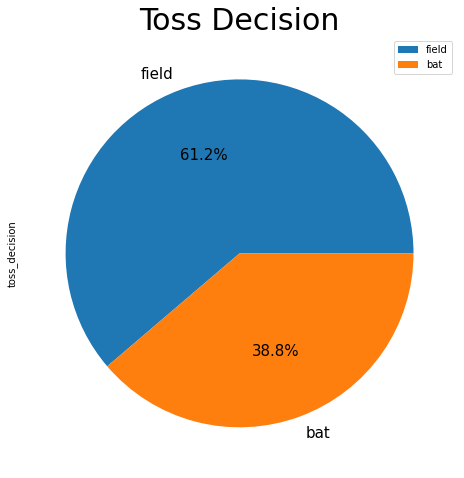

In [26]:
matches['toss_decision'].value_counts().plot(kind = 'pie', autopct="%1.1f%%", fontsize=15, legend = True, figsize=(10,8))  
plt.title('Toss Decision',size=30)
plt.show()

**Most of the toss decision taken by a team is fielding first.**

# ***Seasonwise Toss Decisions:***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


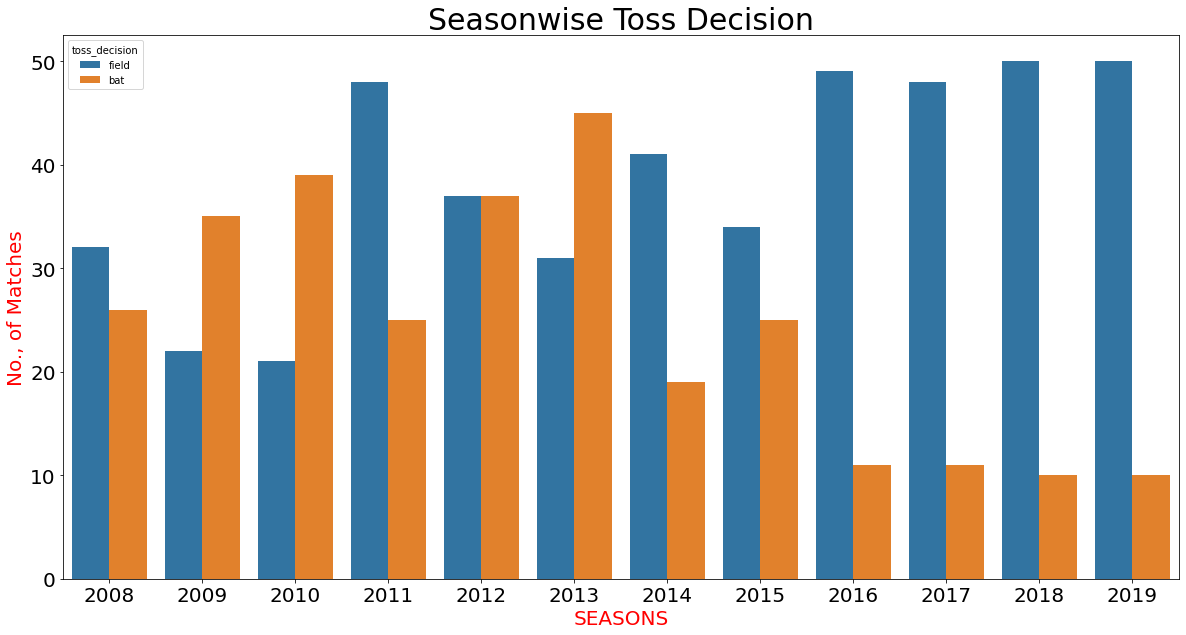

In [27]:
plt.figure(figsize = (20,10))
sb.countplot('season',hue='toss_decision',data=matches)
plt.title("Seasonwise Toss Decision",fontsize=30)
plt.xlabel("SEASONS", fontsize=20, color = 'r')
plt.ylabel("No., of Matches", fontsize=20, color='r')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

**Among all the season, most of the team chosen a fielding first compared to bating.**

# ***MOST SUCCESSFUL TEAMS:***

In [28]:
e = matches['winner'].value_counts().sort_values(ascending = False)
pd.DataFrame(e)

,winner
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29
Rising Pune Supergiants,15


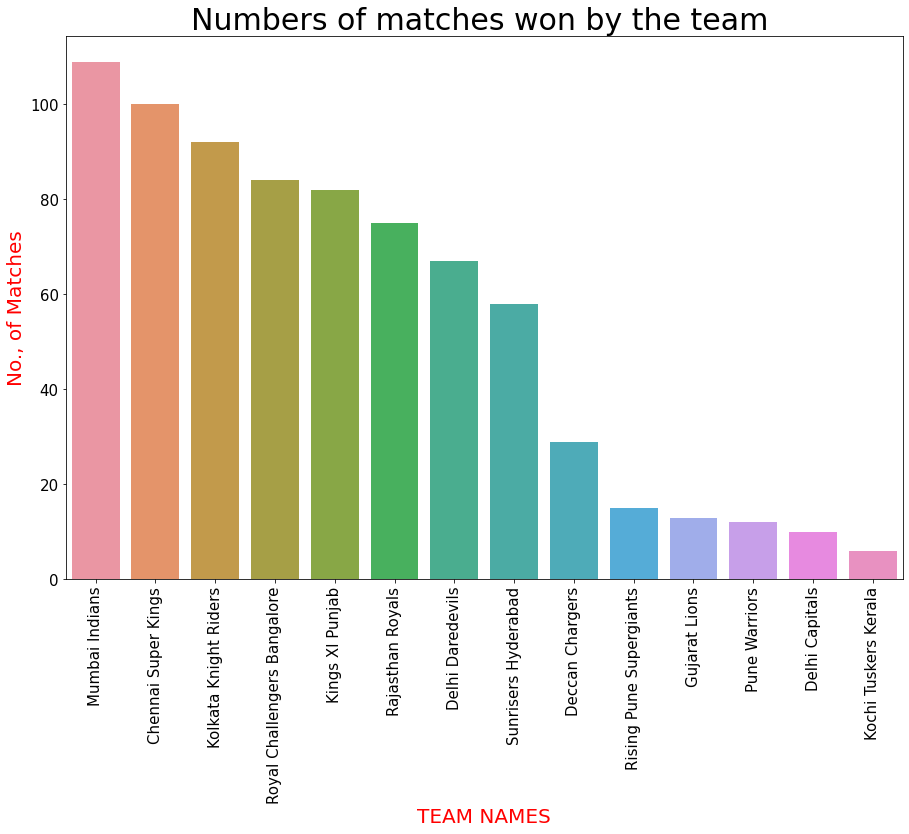

In [50]:
plt.figure(figsize=(15,10))
sb.barplot(x=e.index,y=e)
plt.title("Numbers of matches won by the team ",fontsize=30)
plt.xlabel("TEAM NAMES", fontsize=20, color = 'r')
plt.ylabel("No., of Matches", fontsize=20, color='r')
plt.yticks(size = 15)
plt.xticks (rotation=90, size = 15)
plt.show()

**The most successful teams in the IPL is Mumbai Indians and Chennai Super Kings. Because, compare to other teams, these two teams won more than century matches in these 11 seasons.**

# ***MOST SUCCESSFUL PLAYERS:***

In [30]:
a = matches['player_of_match'].value_counts().head(10).sort_values(ascending = False)
pd.DataFrame(a)

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
MS Dhoni,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13
MEK Hussey,12


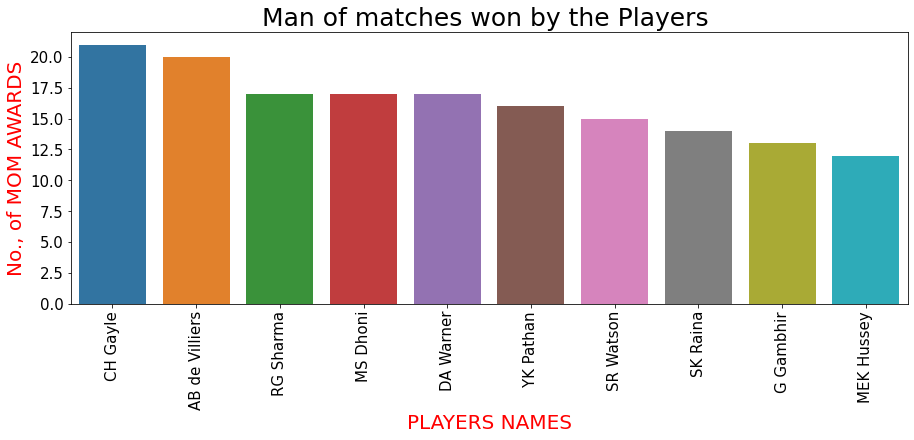

In [65]:
plt.figure(figsize=(15,5))
sb.barplot(x = a.index, y = a)
plt.title("Man of matches won by the Players ",fontsize=25)
plt.xlabel("PLAYERS NAMES", fontsize=20, color = 'r')
plt.yticks(size = 15)
plt.xticks (rotation=90, size = 15)
plt.ylabel('No., of MOM AWARDS',fontsize=20,color='r')
plt.show()

**Here, we conclude those who got 'Man of the Match' award, he is the most successful player. From our analysis, these 10 players are most powerful players than others. Especially,CH Gayle and AB de Villiers are got more awards.** 

# ***Number of matches played in each IPL:***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


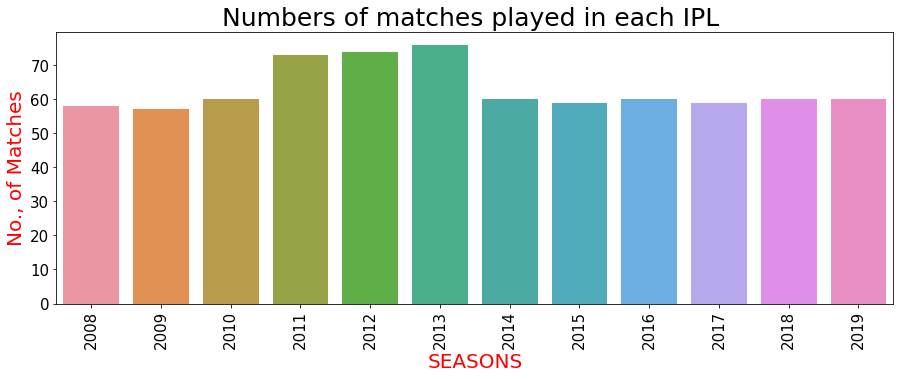

In [64]:
plt.figure(figsize=(15,5))
sb.countplot('season', data = matches)
plt.title("Numbers of matches played in each IPL ",fontsize=25)
plt.xlabel("SEASONS", fontsize=20, color = 'r')
plt.ylabel("No., of Matches", fontsize=20, color='r')
plt.yticks(size = 15)
plt.xticks (rotation=90, size = 15)
plt.show()

**Number of matches played in the IPL gradually increased form 2011 and its peak is 2013. From 2011 to 2013, played highest number of matches that is more than 70 among all the season.**

# ***Most popular venues:***

In [55]:
x = matches['venue'].value_counts().sort_values(ascending=False)
pd.DataFrame(x)

,venue
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,73
Feroz Shah Kotla,67
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Dr DY Patil Sports Academy,17


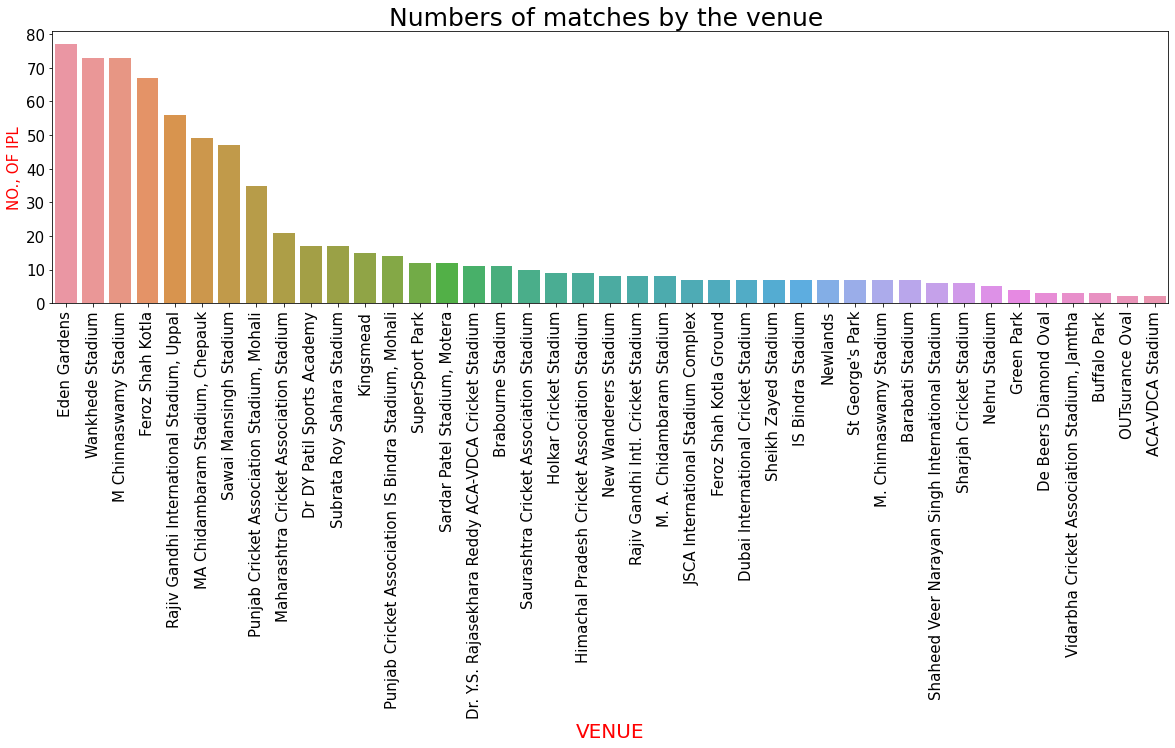

In [63]:
plt.figure(figsize=(20,5))
sb.barplot(x = x.index, y = x)
plt.title("Numbers of matches by the venue ",fontsize=25)
plt.yticks(size = 15)
plt.xticks (rotation=90, size = 15)
plt.xlabel('VENUE',fontsize=20,color='r')
plt.ylabel('NO., OF IPL',fontsize=15,color='r')
plt.show()

**Eden Gardens, Kolkata is the busiest stadium of IPL then Wankhede Stadium, Mumbai and M Chinnaswamy Stadium,Bangalore also a occupied stadium among all the seasons.**

# ***Matches played by each seasons:***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


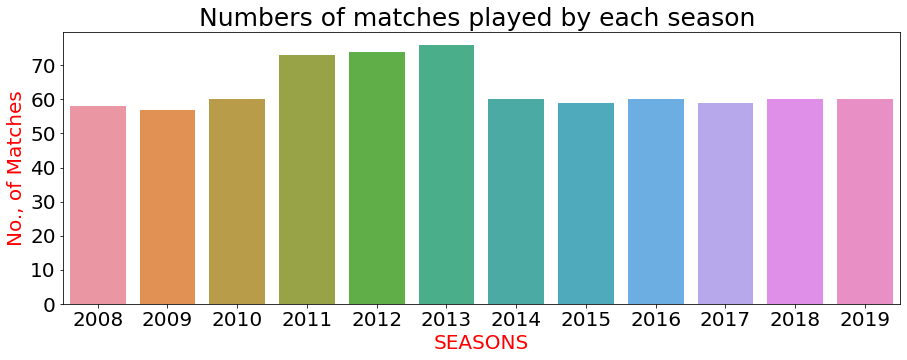

In [94]:
plt.figure(figsize=(15,5))
sb.countplot('season', data = matches)
plt.title("Numbers of matches played by each season ",fontsize=25)
plt.xlabel("SEASONS", fontsize=20, color = 'r')
plt.ylabel("No., of Matches", fontsize=20, color='r')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

**Highest number of matches played between the year of 2011 to 2013.**

# ***Teams participated in each season:***

In [78]:
b = matches.groupby('season')['team1'].nunique().sort_values(ascending=False)
pd.DataFrame(b)

,team1
season,
2011,10
2012,9
2013,9
2008,8
2009,8
2010,8
2014,8
2015,8
2016,8


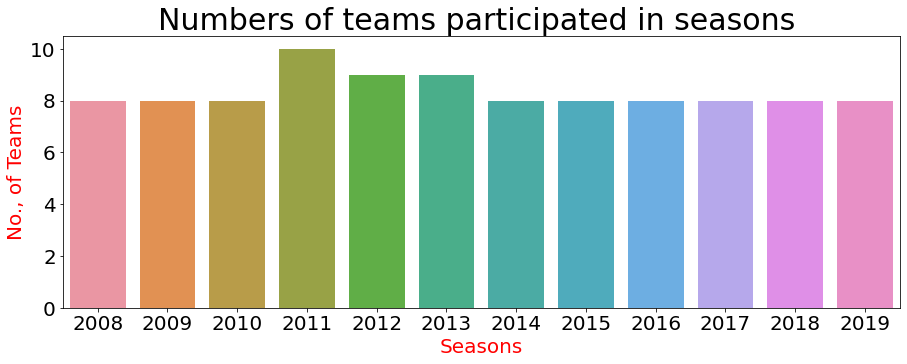

In [95]:
plt.figure(figsize=(15,5))
sb.barplot(x=b.index, y=b)
plt.title("Numbers of teams participated in seasons ",fontsize=30)
plt.ylabel("No., of Teams", fontsize=20, color = 'r')
plt.xlabel("Seasons", fontsize=20, color='r')
plt.yticks(size = 20)
plt.xticks(size = 20, rotation=0)
plt.show()

**Highest number of teams played in the IPL in year of 2013. From 2011 to 2013 is the highest number of teams played in 2008 to 2019.**

# ***Total matches played by a team in each IPL:***

In [38]:
total_matches_played = (matches.team2.value_counts() + matches.team1.value_counts()).sort_values(ascending=False)
pd.DataFrame(total_matches_played)

,0
Mumbai Indians,187
Royal Challengers Bangalore,180
Kolkata Knight Riders,178
Kings XI Punjab,176
Chennai Super Kings,164
Delhi Daredevils,161
Rajasthan Royals,147
Sunrisers Hyderabad,108
Deccan Chargers,75
Pune Warriors,46


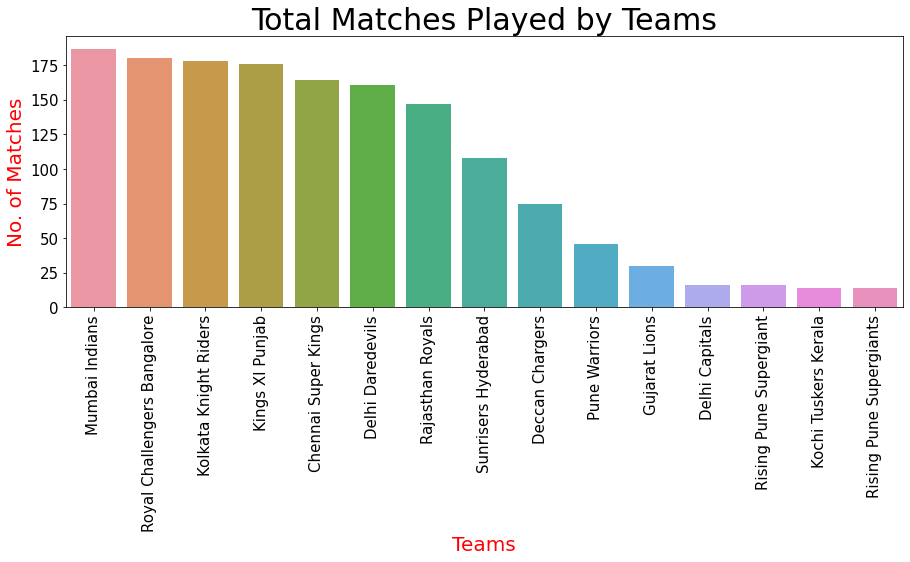

In [89]:
plt.figure(figsize=(15,5))
plt.title('Total Matches Played by Teams', size=30)
sb.barplot(x = total_matches_played.index, y = total_matches_played)
plt.xlabel('Teams', size=20, color='r')
plt.ylabel('No. of Matches', size=20, color='r')
plt.xticks(rotation=90, size =15)
plt.yticks(size=15)
plt.show()

**Mumbai Indians and Royal Challengers Banglore are the teams who played the highest matches in the IPL season 2008 to 2019.**

# ***IPL Champions among all the Seasons:***

In [40]:
ipl_win = matches.groupby('season').tail(1).sort_values('season', ascending = True)
champions = ipl_win.winner.value_counts()
pd.DataFrame(champions)

,winner
Mumbai Indians,4
Chennai Super Kings,3
Kolkata Knight Riders,2
Rajasthan Royals,1
Deccan Chargers,1
Sunrisers Hyderabad,1


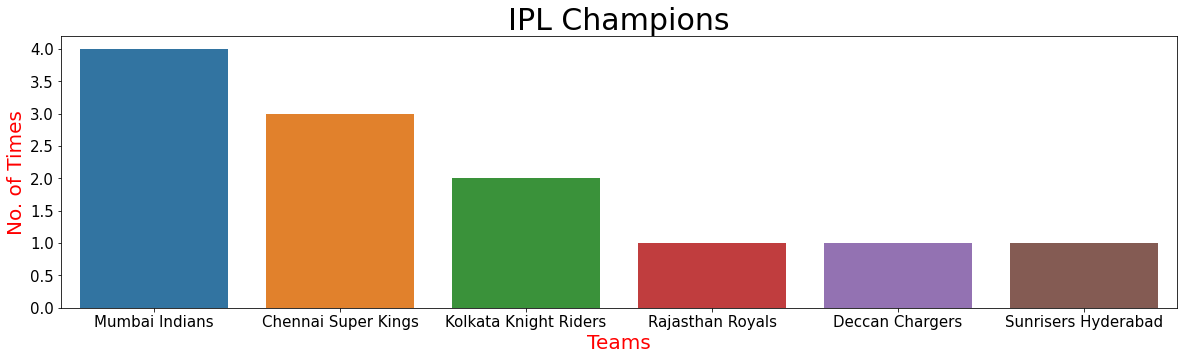

In [77]:
plt.figure(figsize=(20, 5))
plt.title('IPL Champions', size=30)
sb.barplot( x  = champions.index, y = champions)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Teams', size=20, color='r')
plt.ylabel('No. of Times', size=20, color='r')
plt.show()

**In the middle of 12 years,the highest number of championship won by Mumbai Indians and the next competitor is Chennai Super Kings.**

# ***Matches Won Each Seasons:***

In [42]:
c = pd.crosstab(matches['winner'], matches['season'])
c

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


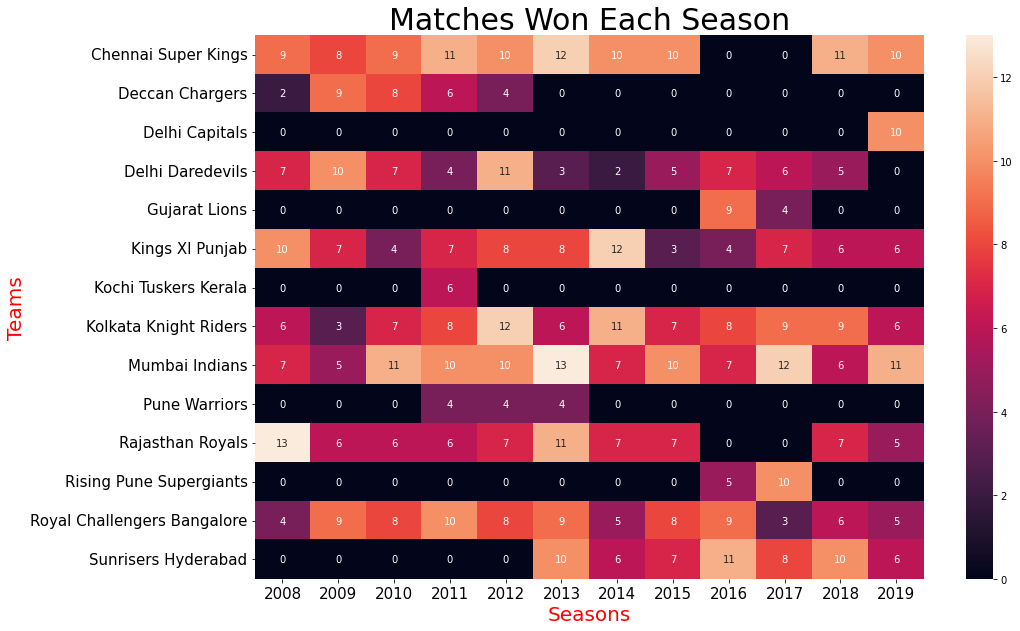

In [90]:
plt.figure(figsize=(15, 10))
sb.heatmap(c, annot = True)
plt.xlabel('Seasons', size=20, color='r')
plt.ylabel('Teams', size=20, color='r')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Matches Won Each Season', size=30)
plt.show()

**From this heatmap, we can easily find out the number of matches played in the year and team. 
Also, Mumbai Indians, Kolkata Knight Riders, Royal Challengers Bangalore, Kings XI punjab played all the season of IPL.**

# ***Number of matches won by Mumbai Indians v/s Chennai Super Kings:***

In [44]:
mc = matches[((matches.team1 == 'Mumbai Indians') & (matches.team2 == 'Chennai Super Kings')) | ((matches.team1 == 'Chennai Super Kings') & (matches.team2 == 'Mumbai Indians'))]
mc = mc.winner.value_counts()
pd.DataFrame(mc)

,winner
Mumbai Indians,17
Chennai Super Kings,11


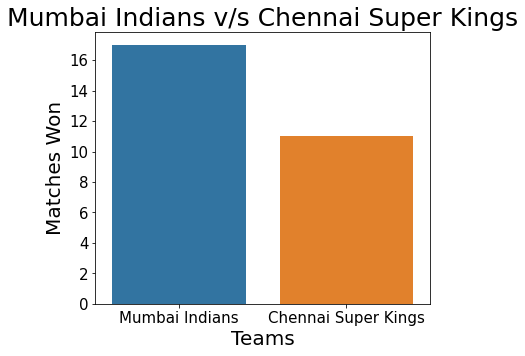

In [92]:
plt.figure(figsize=(6,5))
sb.barplot(x = mc.index, y = mc)
plt.xlabel('Teams', size=20)
plt.ylabel('Matches Won', size=20)
plt.title('Mumbai Indians v/s Chennai Super Kings', size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

**Compare these two competitative teams, Mumbai Indians won more matches than Chennai Super Kings.**

# ***Number of matches occured in city:***

In [46]:
d = pd.crosstab(matches['city'],matches['venue'])
d = d.sum(axis='columns').sort_values(ascending=False)
pd.DataFrame(d)

,0
city,
Mumbai,101
Kolkata,77
Delhi,74
Bangalore,66
Hyderabad,64
Chennai,57
Jaipur,47
Chandigarh,46
Pune,38


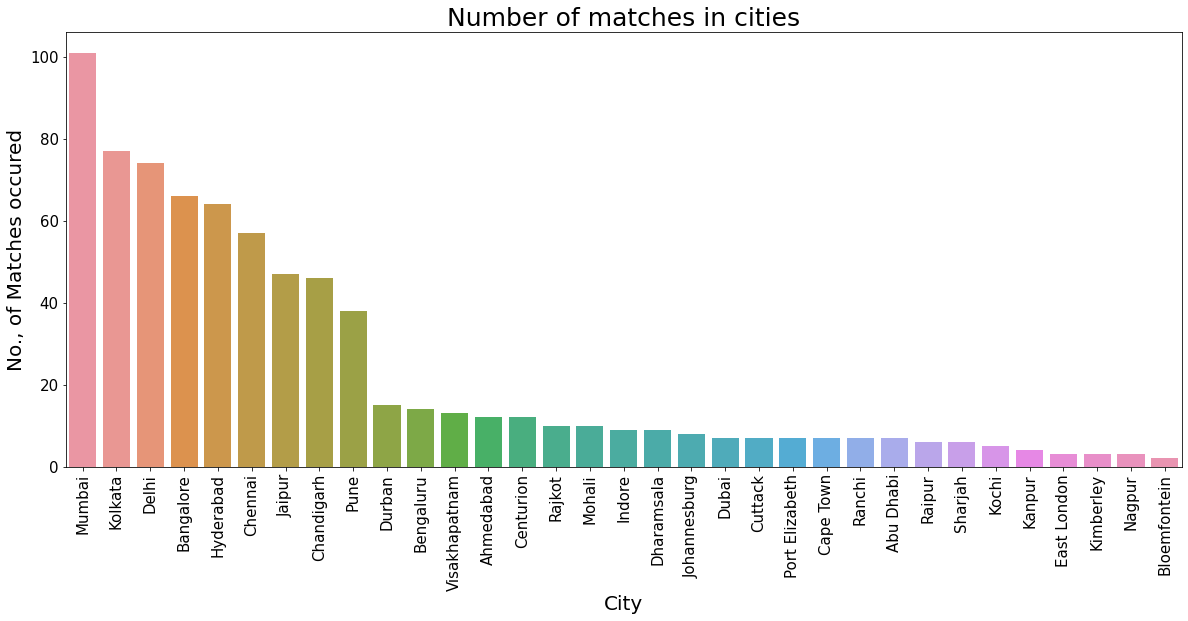

In [96]:
plt.figure(figsize=(20,8))
sb.barplot(x = d.index, y = d)
plt.xlabel('City', size=20)
plt.ylabel('No., of Matches occured', size=20)
plt.title('Number of matches in cities', size=25)
plt.xticks(size=15, rotation=90)
plt.yticks(size=15)
plt.show()

**Highest number of matches held in Mumbai City Stadium in India.**

# **INFERENCE:**

From the inference of the IPL league of 12 years data,
We have drawn some interesting inferences and now know more about the IPL than when we started. Here's a summary of what we learned through our analysis:

*   The peak of this season is year 2013. On this year, highest number of teams, players and matches played in different venues.
*   Also in the year of 2011 and 2012 gradually increases the teams, players and matches counts.
*   Most of matches occured in Mumbai city stadiums. But, the stadium Eden Gardens, Kolkata is most engaged stadium in this IPL season.
*   Average 60 matches played in each IPL season.
*   Chennai and Mumbai are the two teams with the highest win percentage. The fact that they are the only two teams that were part of the first season as well, in the top 5, shows their dominance.
*   Mumbai Indians have the won the IPL 4 times, the most. They are followed by Chennai at 3 and Kolkata Knight Riders at 2. Sunrisers Hyderabad, Deccan Chargers and Rajasthan Royals complete the IPL Champions list, all winning once each.




